<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Relevant-Packages" data-toc-modified-id="Importing-Relevant-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Relevant Packages</a></span></li><li><span><a href="#Loading-and-Transforming-the-Data" data-toc-modified-id="Loading-and-Transforming-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and Transforming the Data</a></span></li><li><span><a href="#Removing-Surplus-Data" data-toc-modified-id="Removing-Surplus-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Removing Surplus Data</a></span></li><li><span><a href="#White-Noise" data-toc-modified-id="White-Noise-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>White Noise</a></span></li><li><span><a href="#Random-Walk" data-toc-modified-id="Random-Walk-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random Walk</a></span></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Stationarity</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Seasonality</a></span></li><li><span><a href="#ACF" data-toc-modified-id="ACF-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>ACF</a></span></li><li><span><a href="#PACF" data-toc-modified-id="PACF-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>PACF</a></span></li></ul></div>

### Importing Relevant Packages

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [13]:
raw_csv_data = pd.read_csv("../data/raw/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [14]:
df_comp['market_value']=df_comp.spx

In [15]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [16]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [17]:
df['wn'] = wn

/Users/poudel/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1098.014929
std,292.559287,295.488863
min,438.920000,62.384005
25%,914.620000,896.388124
50%,1144.650000,1101.671781
75%,1316.280729,1295.568751
max,1570.252238,2232.248941


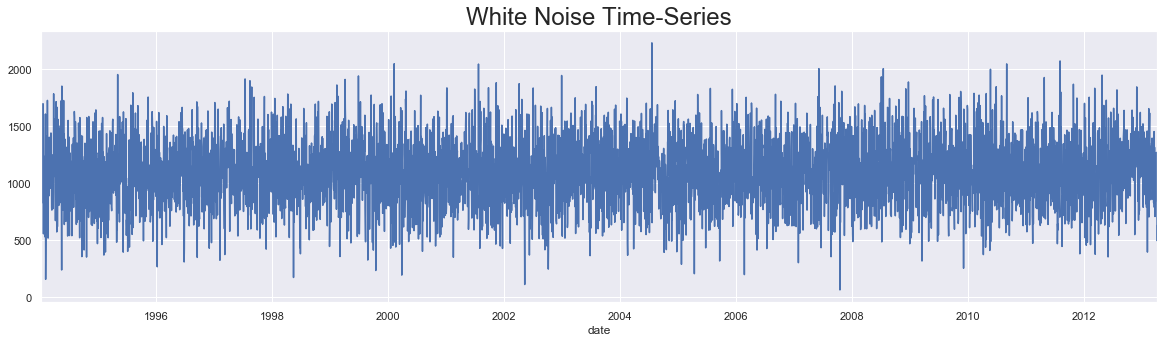

In [19]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

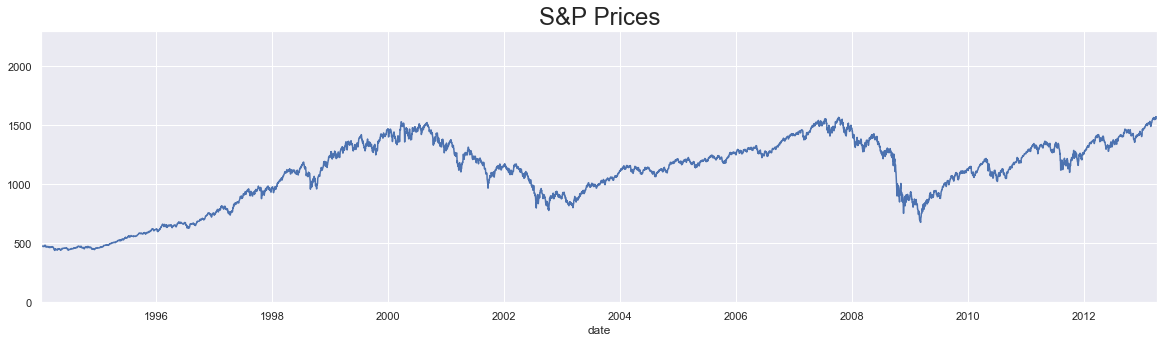

In [20]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [21]:
rw = pd.read_csv("../data/raw/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [22]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [23]:
df['rw'] = rw.price

/Users/poudel/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1583.148690,1122.139662
1994-01-10,475.27,1012.751388,1080.347860
1994-01-11,474.13,1667.448888,1082.095245
1994-01-12,474.17,884.789914,1083.639265
1994-01-13,472.47,1006.976738,1067.146255


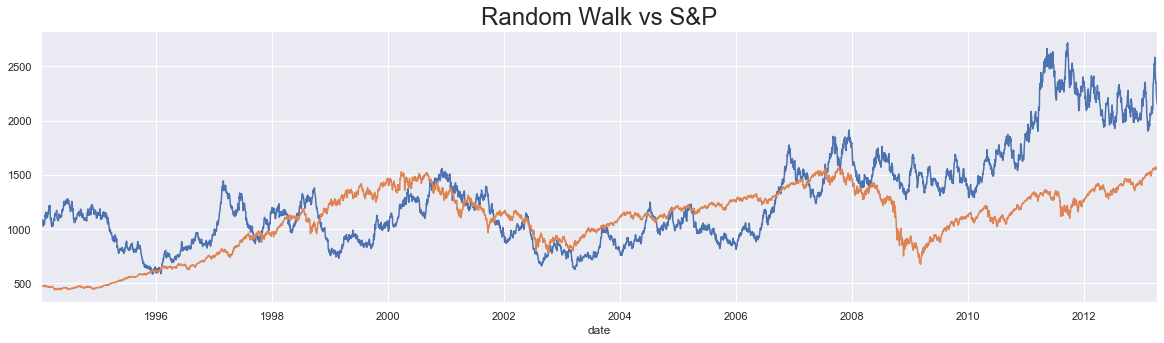

In [25]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity

In [26]:
sts.adfuller(df.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [27]:
sts.adfuller(df.wn)

(-70.1909987881053,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70888.5927341571)

In [28]:
sts.adfuller(df.rw)

(-1.3286073927689708,
 0.6159849181617388,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

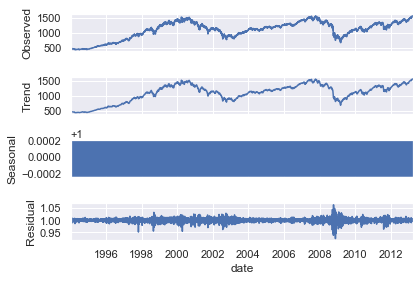

In [29]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

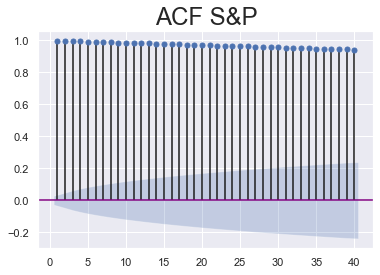

In [30]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

### PACF

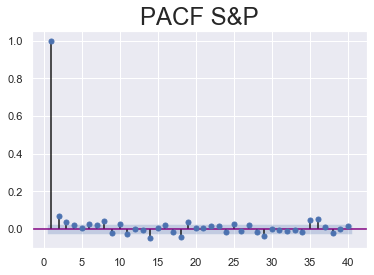

In [31]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

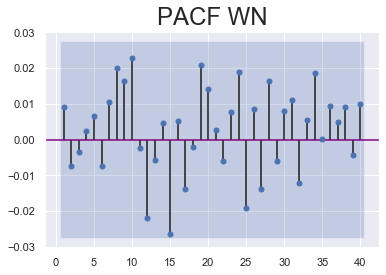

In [32]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()